In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
netflix=pd.read_csv('/content/netflix_titles.csv')
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [116]:
netflix.shape

(8807, 12)

In [117]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [118]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [119]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [120]:
df = netflix.copy()

In [121]:
df=df.dropna()
df.shape

(5332, 12)

In [122]:
# Remove leading and trailing whitespace from date strings
df['date_added'] = df['date_added'].str.strip()

# Convert to datetime, inferring format
df["date_added"] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract day, year, and month
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_name_added'] = df['date_added'].dt.month_name()
df['month_added'] = df['date_added'].dt.month

# Drop the original 'date_added' column
df.drop('date_added', axis=1, inplace=True)


In [123]:
df['release_year'] = df['release_year'].astype(int)
df['year_added']=df['year_added'].astype(int)
df['month_added']=df['month_added'].astype(int)
df['day_added']=df['day_added'].astype(int)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,year_added,month_name_added,month_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,2021,September,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,2021,September,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,2021,September,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,23,2021,September,9
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,21,2021,September,9


<ipython-input-124-a233ccd54cb5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette=colors)


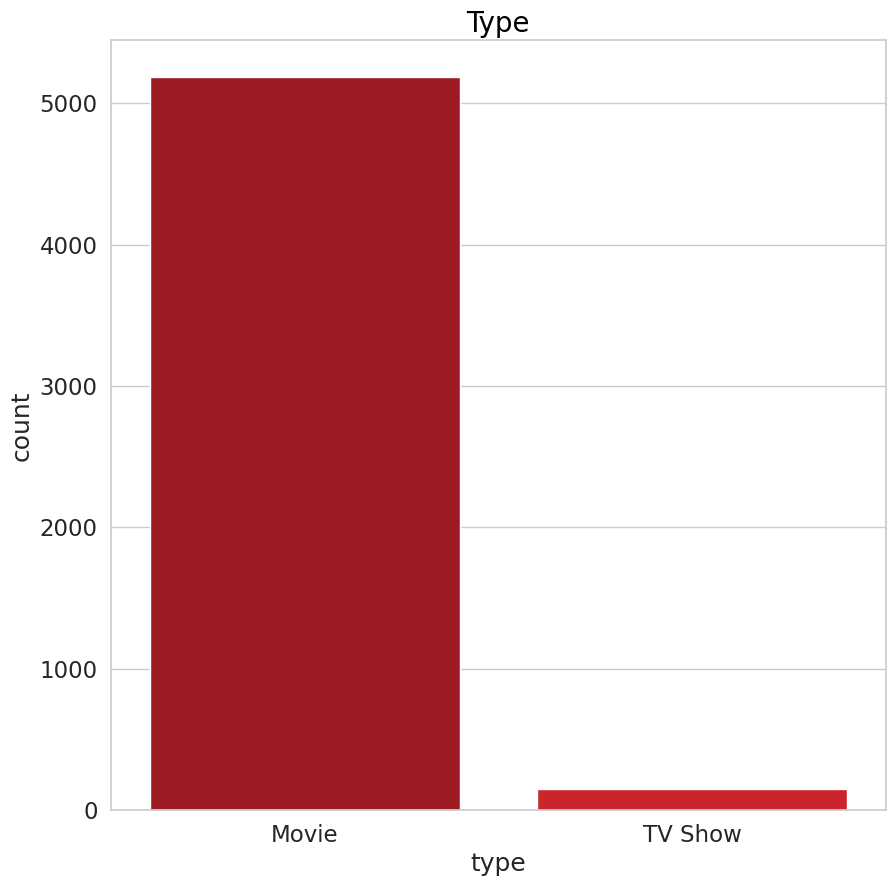

In [124]:
colors = ['#B20710', '#E50914']
sns.countplot(data=df, x='type', palette=colors)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Type', fontsize=20, color='#000000')
plt.show()



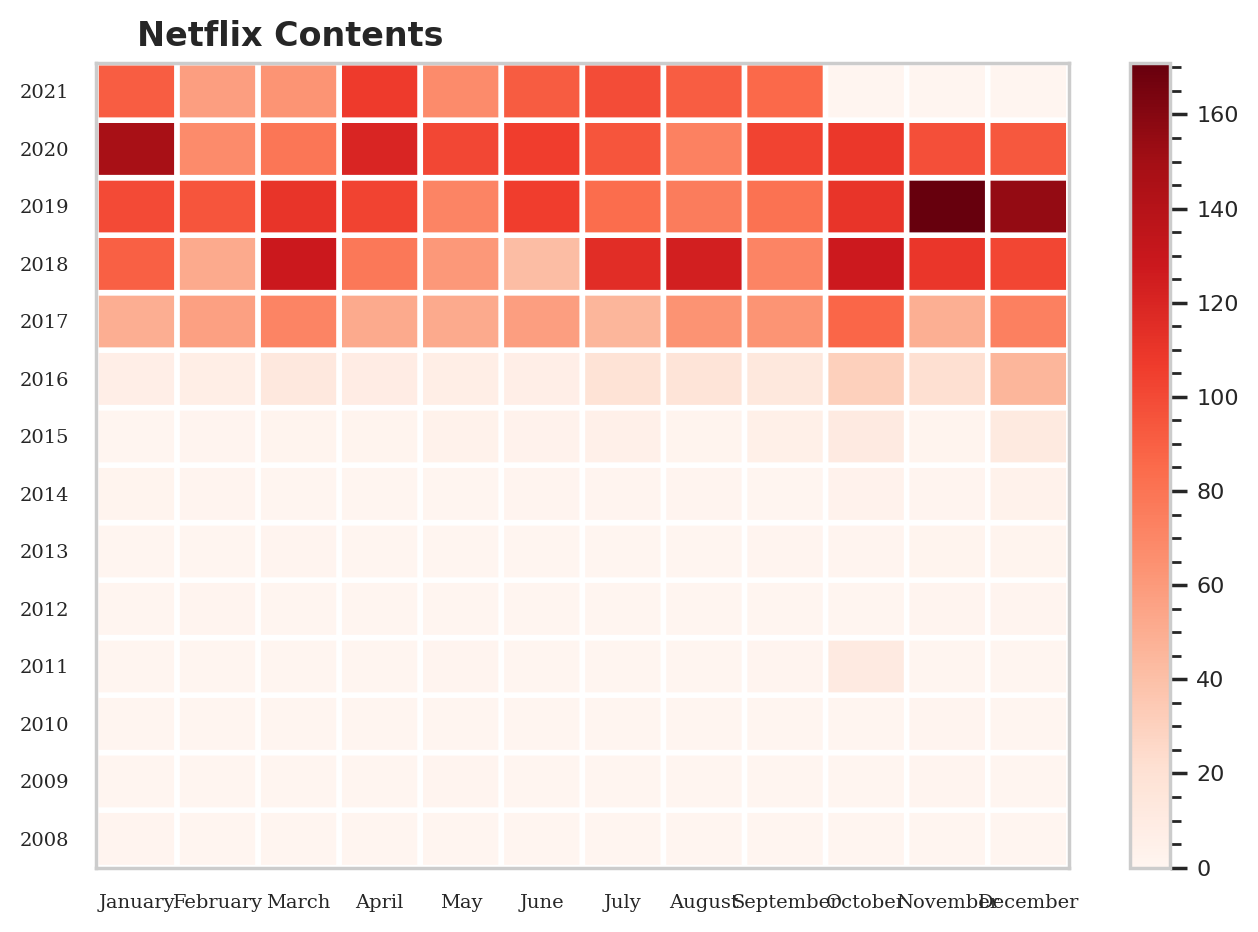

In [125]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

df['month_name_added'] = pd.Categorical(
    df['month_name_added'],
    categories=month_order,
    ordered=True
)
month_counts = df['month_name_added'].value_counts().sort_index().T

least_month = month_counts.idxmin()
plt.figure(figsize=(7,5), dpi=200)
heatmap_data = pd.pivot_table(df, values='title', index='year_added', columns='month_name_added', aggfunc='count')
heatmap_data = heatmap_data.fillna(0)
plt.pcolor(heatmap_data, cmap='Reds', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(heatmap_data.columns), 1), heatmap_data.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(heatmap_data.index), 1), heatmap_data.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents', fontsize=12, fontfamily='Arial', fontweight='bold', position=(0.20, 1.0 + 0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.tight_layout()
plt.show()

<ipython-input-126-d496b9465017>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", color=tick_color)


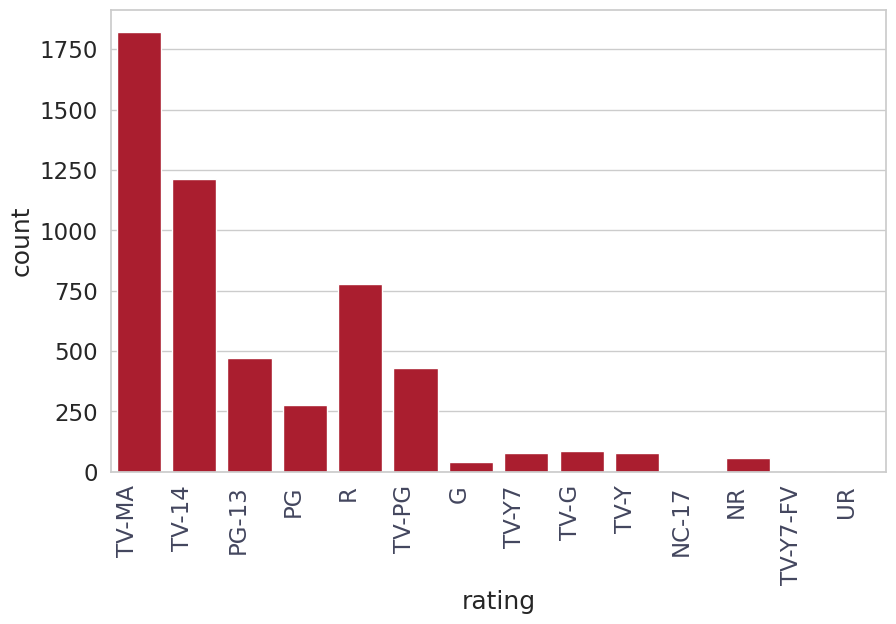

In [126]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.countplot(x='rating', data=df, color=('#c1071e'))

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", color=tick_color)

# Customize plot aesthetics
ax.set_facecolor(background_color)


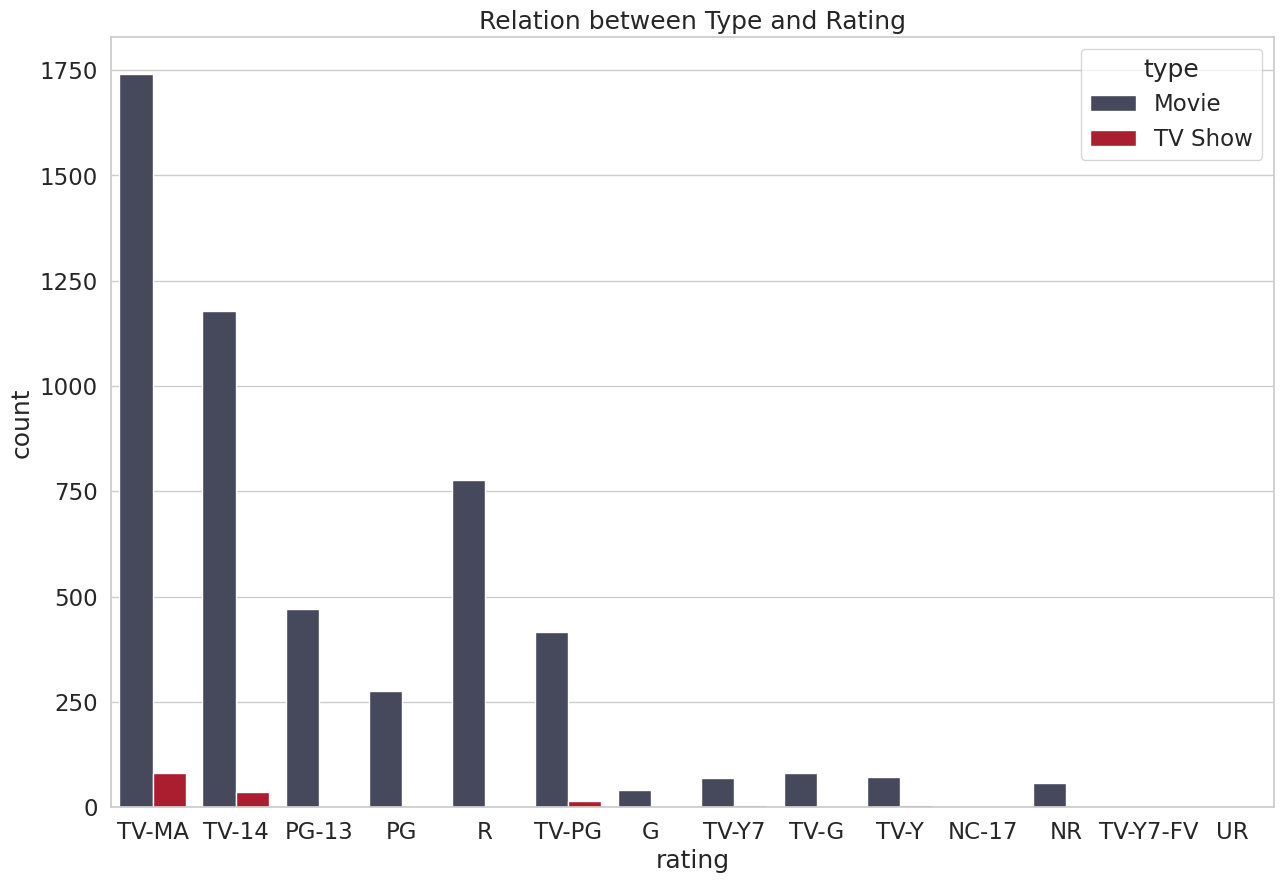

In [127]:
palette = {'#43465e','#c1071e'}

plt.figure(figsize=(15, 10))
sns.countplot(x='rating', hue='type', data=df, palette=palette)
plt.title('Relation between Type and Rating')
plt.show()

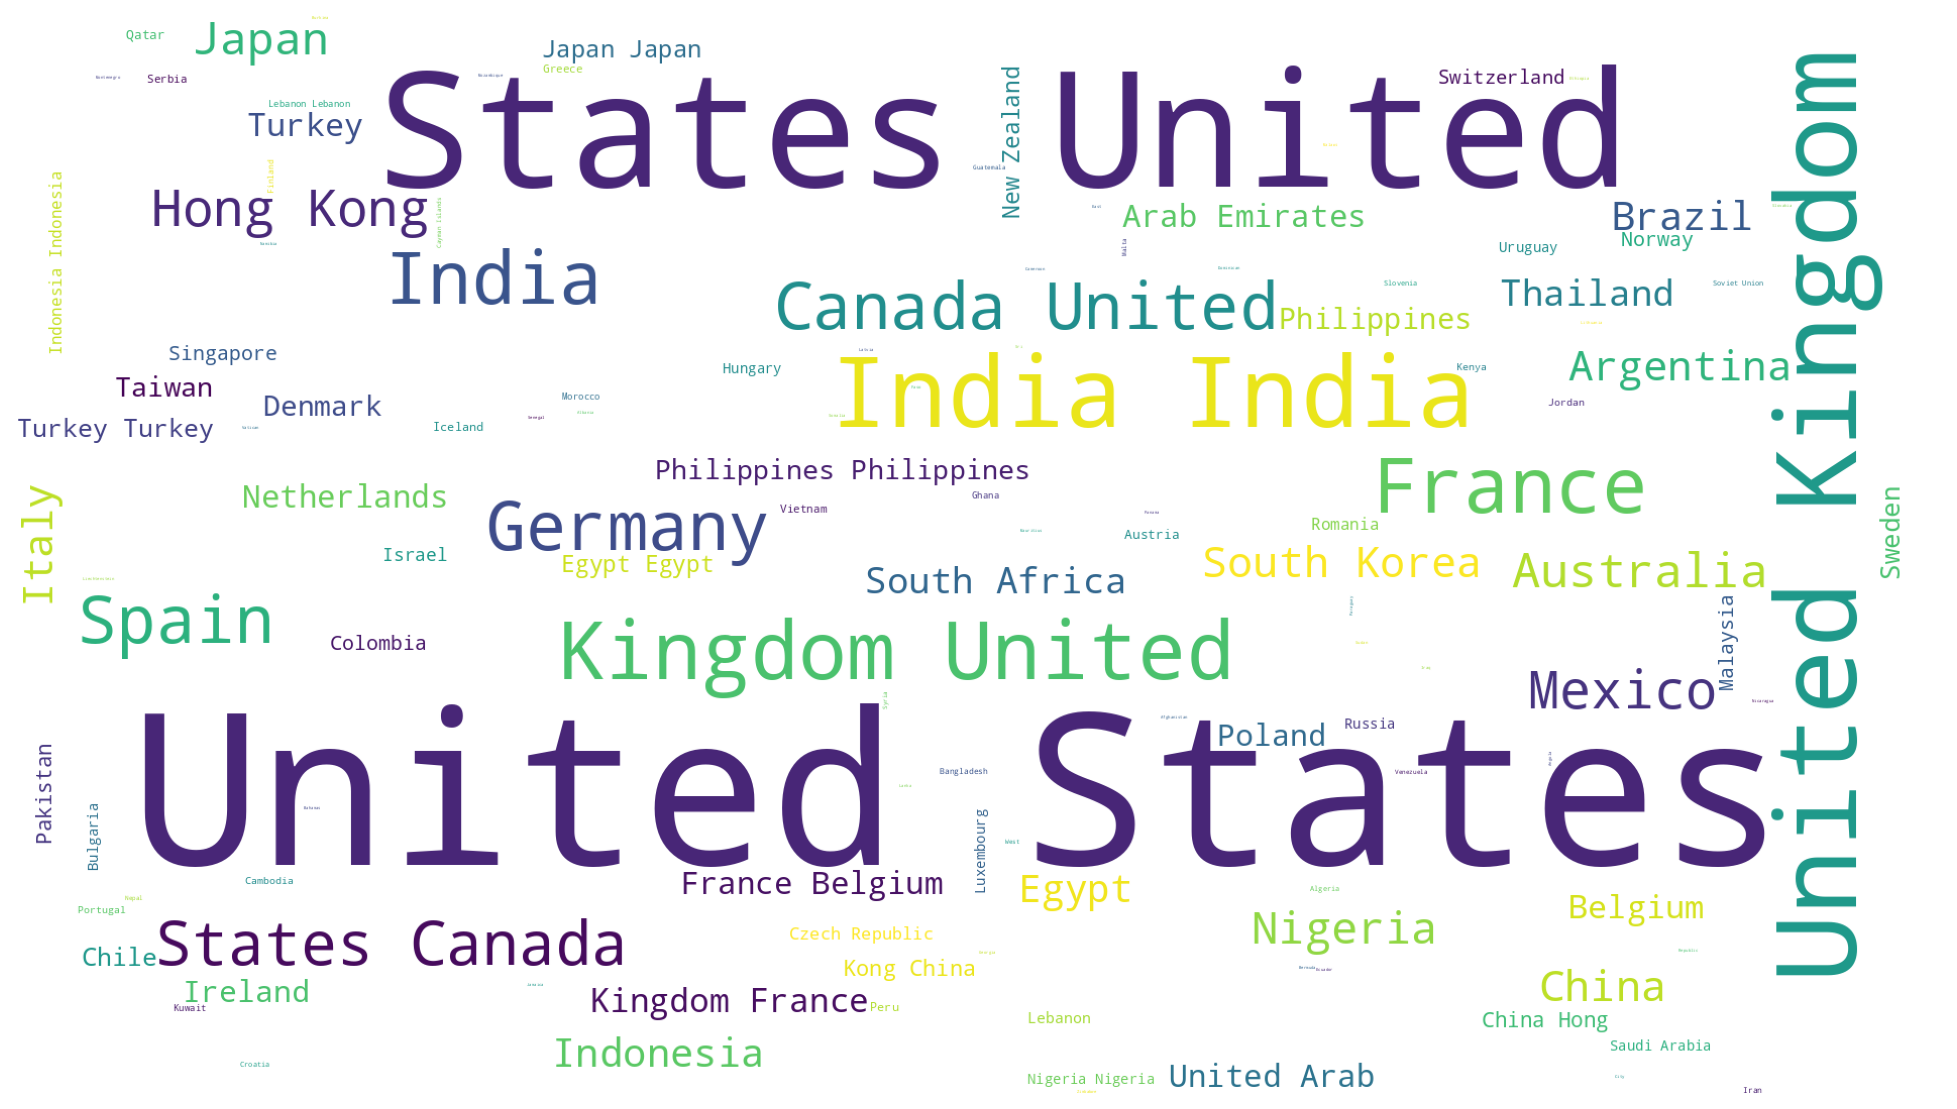

In [128]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()


In [129]:
movies_only_in_japan = df[(df["type"] == "Movie") & (df["country"] == "Japan")]["title"]
movies_only_in_japan.count()

73

In [130]:
country_count = df.copy()
country_count = pd.concat([country_count, df["country"].str.split(",", expand = True)], axis = 1)
country_count

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,...,month_name_added,month_added,0,1,2,3,4,5,6,7
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",...,September,9,United States,Ghana,Burkina Faso,United Kingdom,Germany,Ethiopia,None,None
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",...,September,9,United Kingdom,None,None,None,None,None,None,None
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",...,September,9,United States,None,None,None,None,None,None,None
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",...,September,9,Germany,Czech Republic,None,None,None,None,None,None
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",...,September,9,India,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",...,March,3,United Arab Emirates,Jordan,None,None,None,None,None,None
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",...,November,11,United States,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",...,November,11,United States,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies",...,January,1,United States,None,None,None,None,None,None,None


In [131]:
country_count["country"].value_counts()[:10]

country
United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: count, dtype: int64

<ipython-input-132-406270a94d64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = country, y = country.index, palette = "Accent")


Text(0.5, 0, 'Count')

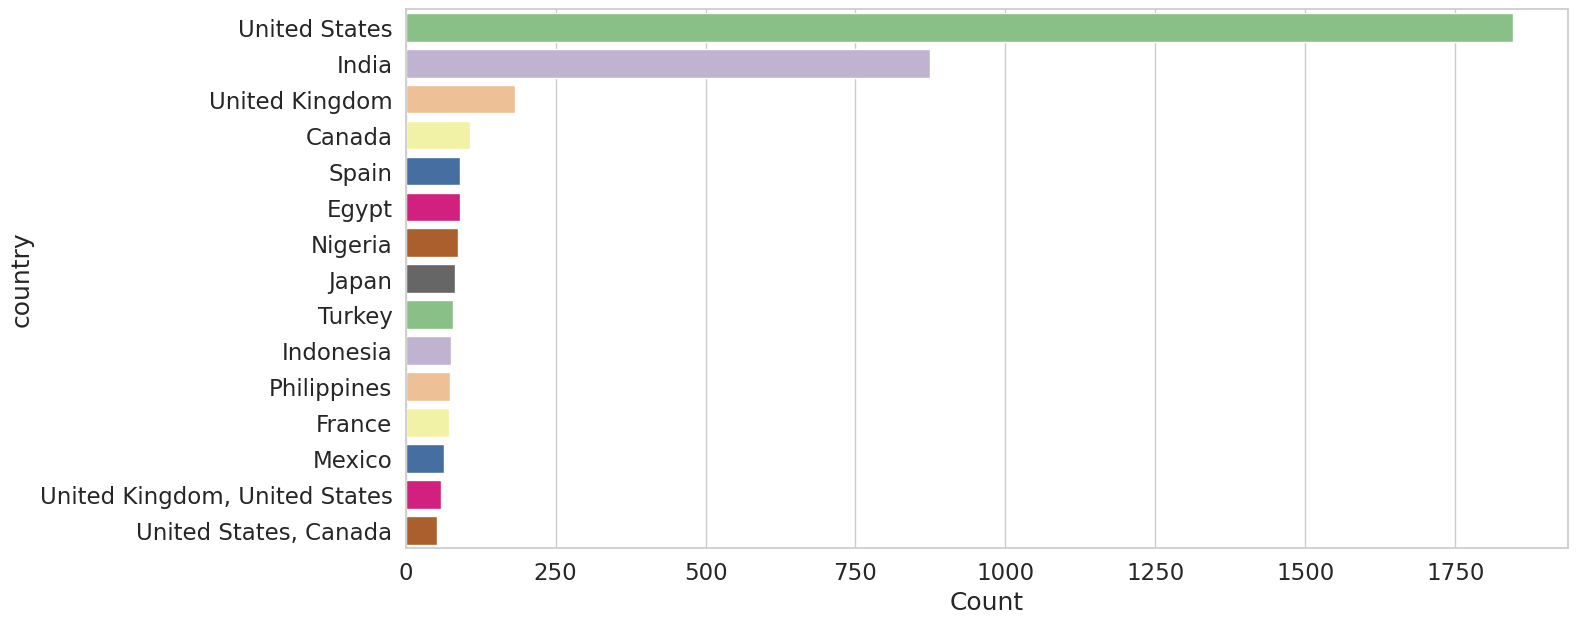

In [132]:
plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:15]
sns.barplot(x = country, y = country.index, palette = "Accent")
plt.xlabel("Count")

In [133]:
cast_count = df.copy()
cast_count = pd.concat([cast_count, df["cast"].str.split(",", expand = True)], axis = 1)
cast_count

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,...,34,35,36,37,38,39,40,41,42,43
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",...,None,None,None,None,None,None,None,None,None,None
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",...,None,None,None,None,None,None,None,None,None,None
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",...,None,None,None,None,None,None,None,None,None,None
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",...,None,None,None,None,None,None,None,None,None,None
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",...,None,None,None,None,None,None,None,None,None,None
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies",...,None,None,None,None,None,None,None,None,None,None


<ipython-input-134-5de98299062f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = cast, y = cast.index, palette = netflix_palette)
<ipython-input-134-5de98299062f>:4: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = cast, y = cast.index, palette = netflix_palette)


<Axes: xlabel='count', ylabel='cast'>

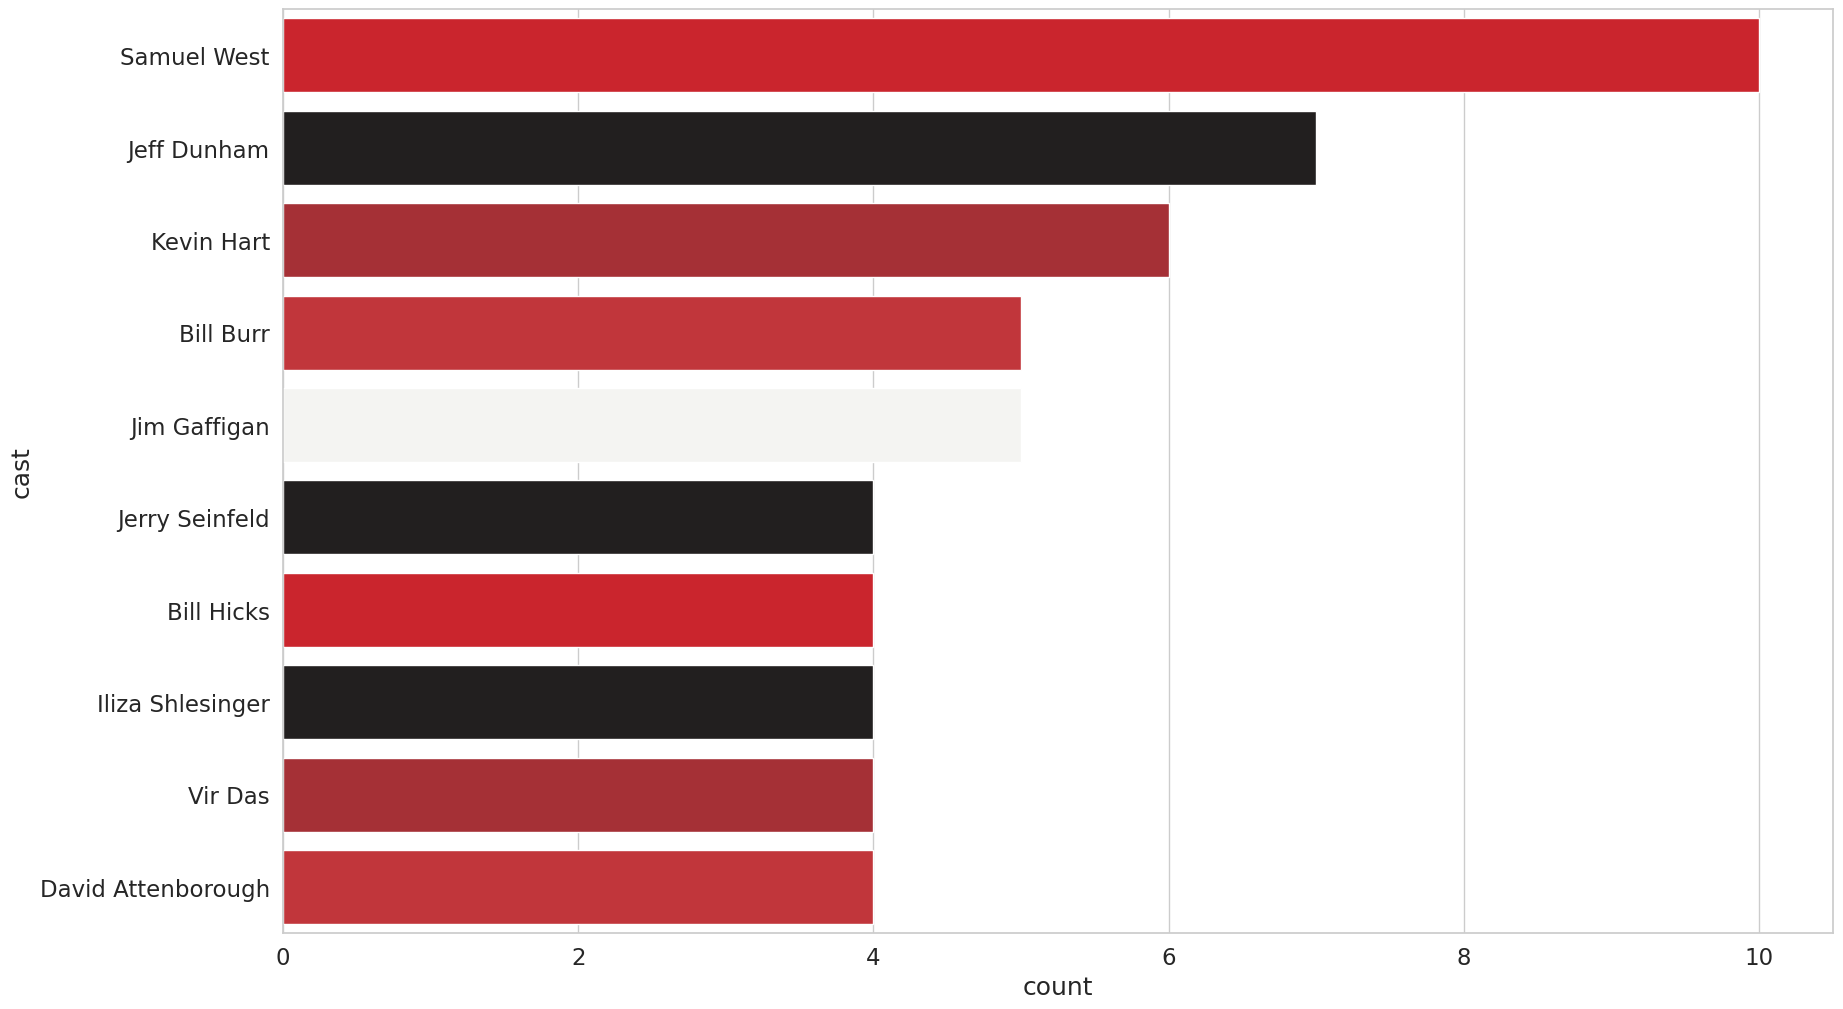

In [134]:
netflix_palette =(["#E50914", "#221F1F", "#B81D24", "#D81F26", "#F5F5F1", "#221F1F"])
plt.figure(figsize = (20, 12))
cast = cast_count["cast"].value_counts()[:10]
sns.barplot(x = cast, y = cast.index, palette = netflix_palette)

In [135]:
listed_in_count = df.copy()
listed_in_count = pd.concat([listed_in_count, df["listed_in"].str.split(",", expand = True)], axis = 1)
listed_in_count

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,year_added,month_name_added,month_added,0,1,2
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,2021,September,9,Dramas,Independent Movies,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,2021,September,9,British TV Shows,Reality TV,None
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,2021,September,9,Comedies,Dramas,None
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,23,2021,September,9,Dramas,International Movies,None
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,21,2021,September,9,Comedies,International Movies,Romantic Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9,2016,March,3,Dramas,International Movies,Thrillers
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,2019,November,11,Cult Movies,Dramas,Thrillers
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,2019,November,11,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,2020,January,1,Children & Family Movies,Comedies,None


In [136]:
listed_in_count = listed_in_count.melt(id_vars=["type", "title"], value_vars=range(3), value_name="listed_in_value")
listed_in_count = listed_in_count[listed_in_count["listed_in_value"].notna()]


<ipython-input-137-56ef81454de6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listed_in.values, y=listed_in.index, palette=netflix_palette)
<ipython-input-137-56ef81454de6>:3: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=listed_in.values, y=listed_in.index, palette=netflix_palette)


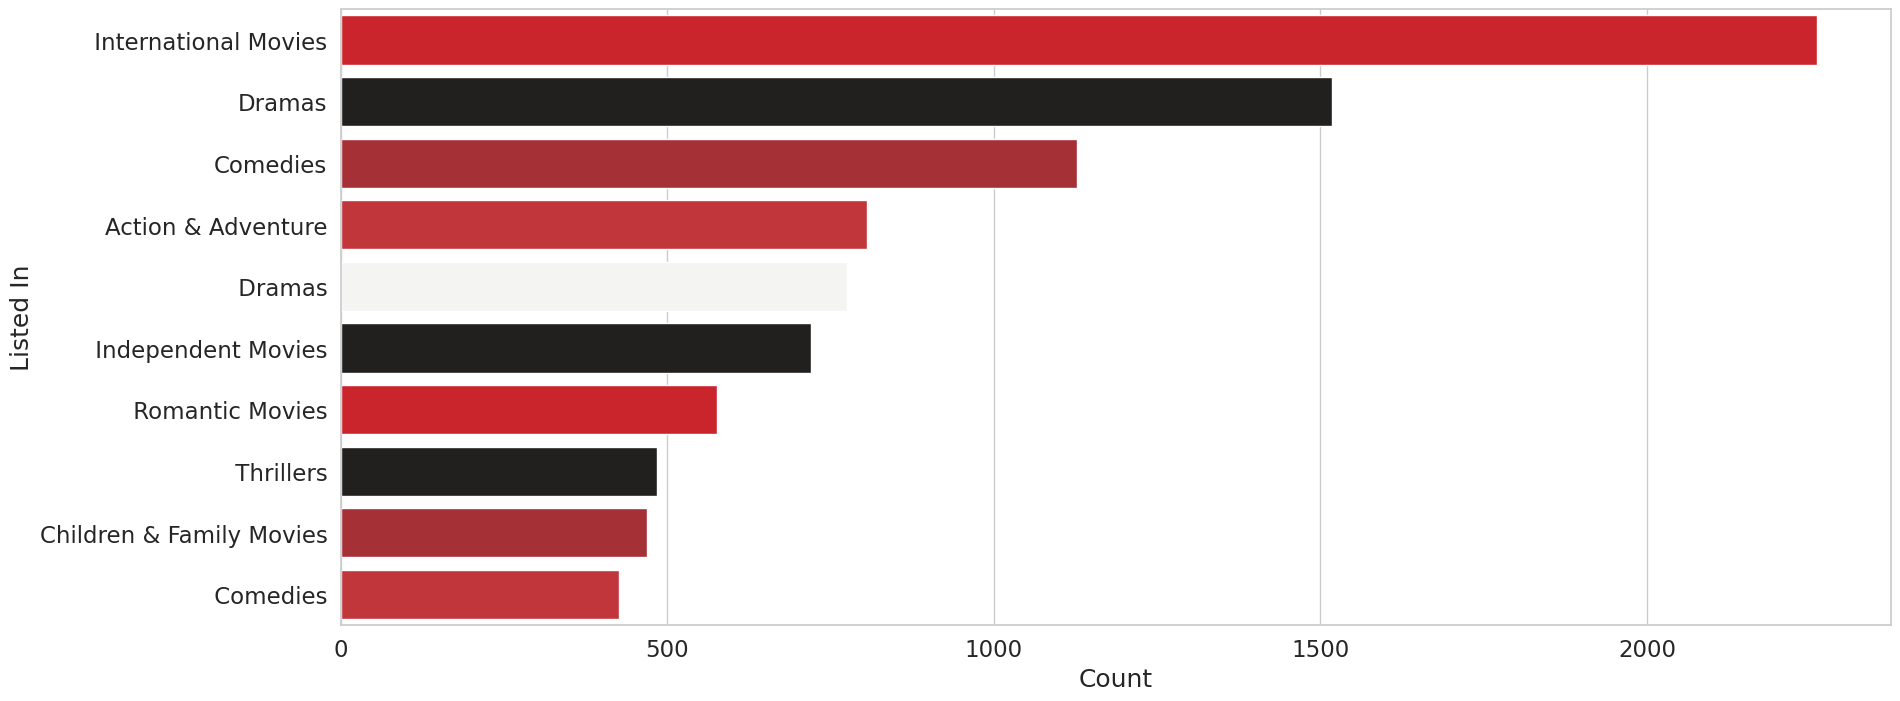

In [137]:
plt.figure(figsize=(20, 8))
listed_in = listed_in_count["listed_in_value"].value_counts()[:10]
sns.barplot(x=listed_in.values, y=listed_in.index, palette=netflix_palette)
plt.xlabel('Count')
plt.ylabel('Listed In')
plt.show()
